### Numerical solution

FPlanck is a Python library for numerically solving the Fokker-Planck partial differential equation in N dimensions using a matrix numerical method. We will use it to find the numerical solution of the PDE and measure the training and test errors of our PINN.

$$\frac{\partial p(x,t)}{\partial t} = \frac{\partial}{\partial x}\left[\frac{m\omega^2}{\gamma} x \,p(x,t) + D \frac{\partial p(x,t)}{\partial x}\right] \qquad A= \frac{m\omega^2}{\gamma}$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import constants
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, harmonic_potential, gaussian_pdf, uniform_pdf

$$A= \frac{m\omega^2}{\gamma} = \frac{m\omega^2 D}{k_B T} $$

In [16]:
nm = 1e-9
viscosity = 8e-4
radius = 20*nm
drag = 6*np.pi*viscosity*radius
T = 300
# m*omega^2
k = 1e-6

print(T, drag)

300 3.0159289474462015e-10


In [17]:
# Equivalent constants in PINNs
D = T*constants.k/drag
A = k/drag
print('D = ', D)
print('A = ', A)

D =  1.3733569564055138e-11
A =  3315.727981081153


In [18]:
# Define the harmonic potential
U = harmonic_potential(0, k)

# Model the function
sim = fokker_planck(temperature=T, drag=drag,
                    extent= 600*nm, #extent (size) of the grid (vector)
                    resolution=10*nm, #spatial resolution of the grid (scalar or vector)
                    boundary=boundary.reflecting, #type of boundary condition - boundaries are grid limits
                    potential=U)

In [19]:
### steady-state solution
steady = sim.steady_state()

In [20]:
### time-evolved solution
pdf = gaussian_pdf(125*nm, 25*nm)
p0 = pdf(sim.grid[0])
Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 3e-3, Nsteps=Nsteps)

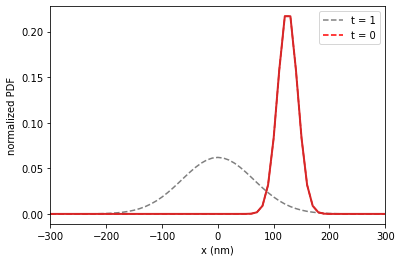

In [21]:
### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0]/nm, steady, color='k', ls='--', alpha=.5, label = 't = 1')
ax.plot(sim.grid[0]/nm, p0, color='red', ls='--', alpha=1, label = 't = 0')
ax.legend()
line, = ax.plot(sim.grid[0]/nm, p0, lw=2, color='C3')

def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='normalized PDF')
ax.margins(x=0)

plt.show()